In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data = df.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [9]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<Axes: xlabel='SepalLengthCm'>

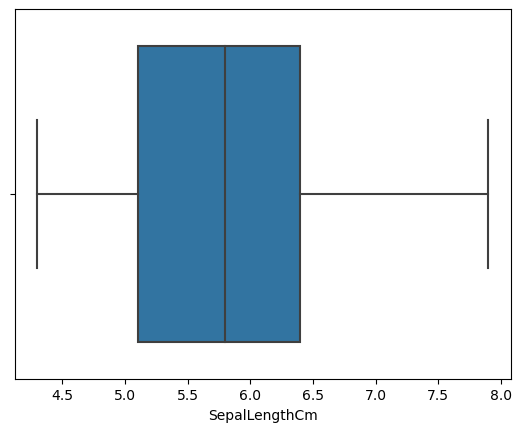

In [10]:
sns.boxplot(x=df["SepalLengthCm"],showfliers = True)

<Axes: xlabel='SepalWidthCm'>

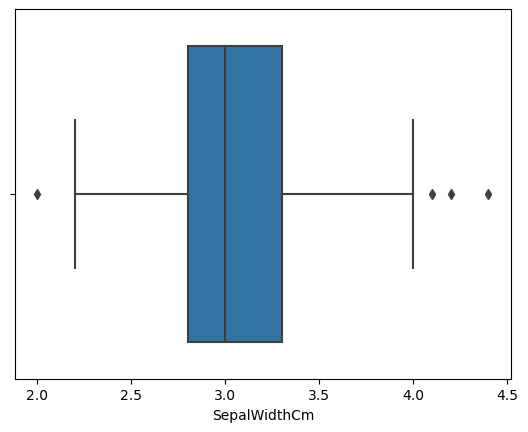

In [11]:
sns.boxplot(x='SepalWidthCm', data=df)

<Axes: xlabel='PetalWidthCm'>

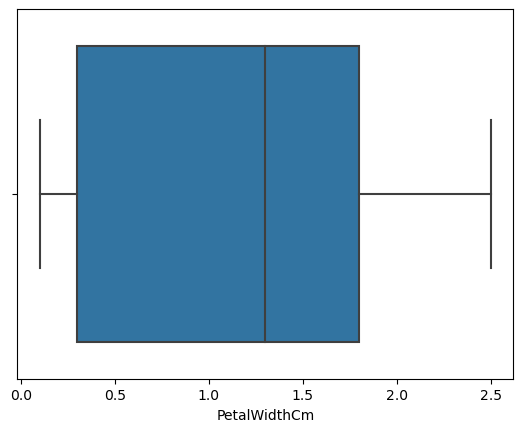

In [12]:
sns.boxplot(x=df["PetalWidthCm"],showfliers = True)

Old Shape:  (150, 6)
New Shape:  (146, 6)


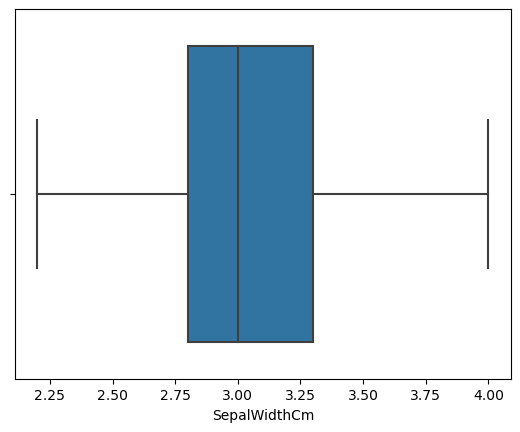

In [13]:
def remove_outliers_iqr(data_frame, column_name):
    Q1 = np.percentile(data_frame[column_name], 25, method='midpoint')
    Q3 = np.percentile(data_frame[column_name], 75, method='midpoint')
    IQR = Q3 - Q1
    
    upper = np.where(data_frame[column_name] >= (Q3 + 1.5 * IQR))
    lower = np.where(data_frame[column_name] <= (Q1 - 1.5 * IQR))
    
    data_frame.drop(upper[0], inplace=True)
    data_frame.drop(lower[0], inplace=True)
    
    sns.boxplot(x=column_name, data=data_frame)
    
    return data_frame

# Assuming 'df' is your DataFrame and 'SepalWidthCm' is the column of interest
print("Old Shape: ", df.shape)
new_df = remove_outliers_iqr(df, 'SepalWidthCm')
print("New Shape: ", new_df.shape)

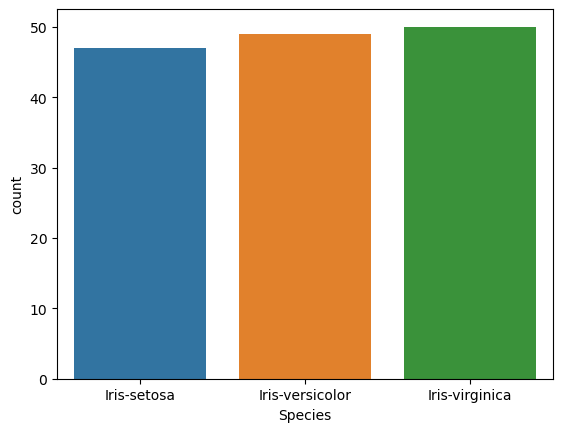

In [14]:
sns.countplot(x='Species', data=df, )
plt.show()

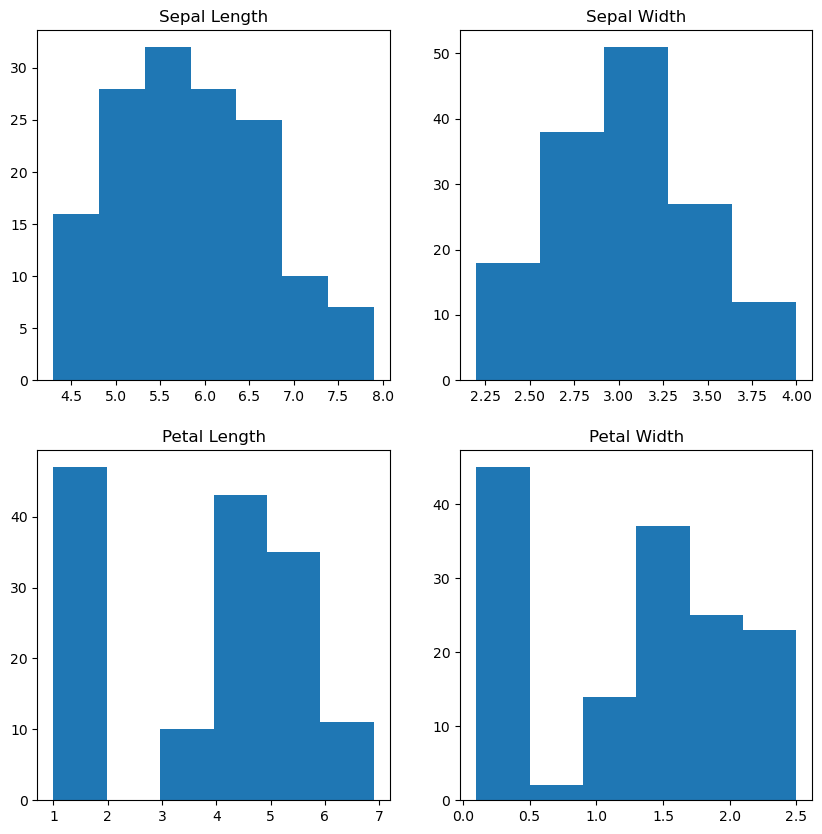

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);